In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from dataframe_builder import build_data_frame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [43]:
df_totals, df_aggregated  =build_data_frame(r"..\data_files")

In [44]:
df_aggregated['MP'].median()

922.0

In [45]:
df_aggregated['MP'].describe()

count    2253.000000
mean     1022.502885
std       788.867942
min         1.000000
25%       271.000000
50%       922.000000
75%      1685.000000
max      3036.000000
Name: MP, dtype: float64

<Axes: xlabel='MP', ylabel='Count'>

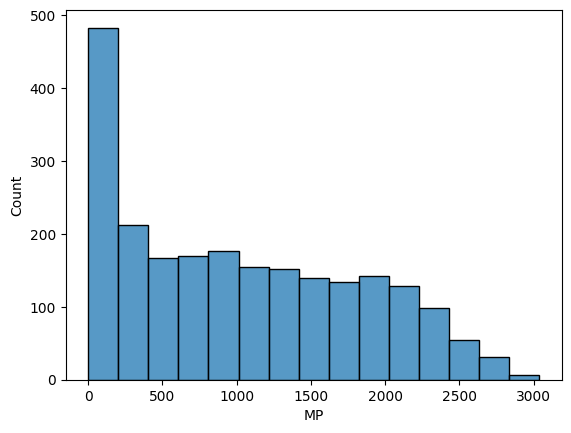

In [46]:
sns.histplot(data=df_aggregated, x='MP')

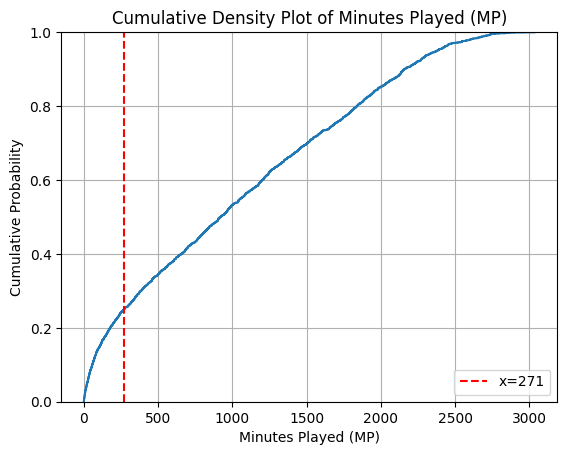

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.ecdfplot(df_aggregated['MP'])
plt.title('Cumulative Density Plot of Minutes Played (MP)')
plt.xlabel('Minutes Played (MP)')
plt.ylabel('Cumulative Probability')
plt.axvline(x=271, color='red', linestyle='--', label='x=271')  # corrected here
plt.grid(True)
plt.legend()
plt.show()



In [48]:
df_aggregated['MP'].quantile(0.25)

271.0

<Axes: ylabel='MP'>

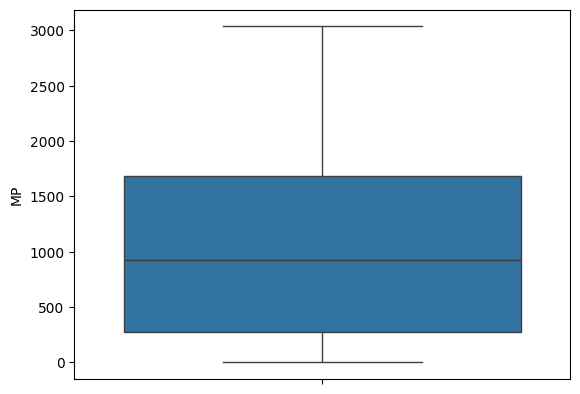

In [49]:
sns.boxplot(df_aggregated['MP'])

In [50]:
#remove players with less 271 minutes
df271 = df_aggregated[df_aggregated['MP'] >=922].copy()

#select dtypes = numeric
df271_numeric = df271.select_dtypes('number').drop(columns=['Age', 'Year'])

In [51]:
df271_numeric.columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [52]:
for col in df271_numeric.columns:
    new_col = str(col) + "_per36"
    df271_numeric[new_col] = (df271_numeric[col] / df271_numeric['MP']) * 36

In [53]:
per36_columns = [col for col in df271_numeric.columns if 'per36' in col]
per36_columns.pop(0)
per36_columns.pop(0)
per36_columns.pop(0)
per36_columns

['FG_per36',
 'FGA_per36',
 '3P_per36',
 '3PA_per36',
 '2P_per36',
 '2PA_per36',
 'FT_per36',
 'FTA_per36',
 'ORB_per36',
 'DRB_per36',
 'TRB_per36',
 'AST_per36',
 'STL_per36',
 'BLK_per36',
 'TOV_per36',
 'PF_per36',
 'PTS_per36']

In [54]:
df271_numeric.columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'G_per36',
       'GS_per36', 'MP_per36', 'FG_per36', 'FGA_per36', '3P_per36',
       '3PA_per36', '2P_per36', '2PA_per36', 'FT_per36', 'FTA_per36',
       'ORB_per36', 'DRB_per36', 'TRB_per36', 'AST_per36', 'STL_per36',
       'BLK_per36', 'TOV_per36', 'PF_per36', 'PTS_per36'],
      dtype='object')

In [55]:
# Step 1: Select relevant features
features = ['G', 'GS', 'MP'] + per36_columns
X = df271_numeric[features]

# # Step 4 (Optional): Rename cluster labels manually after inspection
# # e.g., df_aggregated['Cluster_Label'] = df_aggregated['Cluster'].map({0: "Big", 1: "Wing", 2: "Point"})

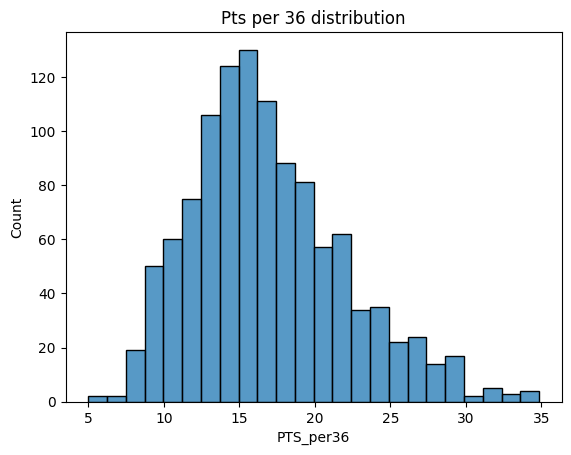

In [56]:
#Points per 36 minutes distributor
sns.histplot(df271_numeric['PTS_per36'])
plt.title('Pts per 36 distribution');

In [57]:
# # Remove highly correlated columns
# corr_matrix = df271_numeric.corr().abs()
# upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# df_numeric_reduced = df271_numeric.drop(columns=to_drop)

In [103]:
# 1. Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3. KMeans on PCA components
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add clusters to DataFrame
df271_numeric['Cluster'] = clusters

# Now visualize with your 3D plot (e.g., Plotly or Matplotlib)


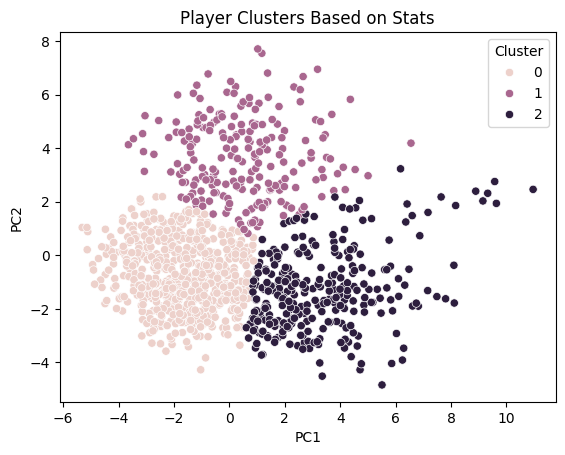

In [104]:
df271_numeric['PC1'] = X_pca[:, 0]
df271_numeric['PC2'] = X_pca[:, 1]

# Scatter plot
sns.scatterplot(data=df271_numeric, x='PC1', y='PC2', hue='Cluster')
plt.title("Player Clusters Based on Stats")
plt.show()

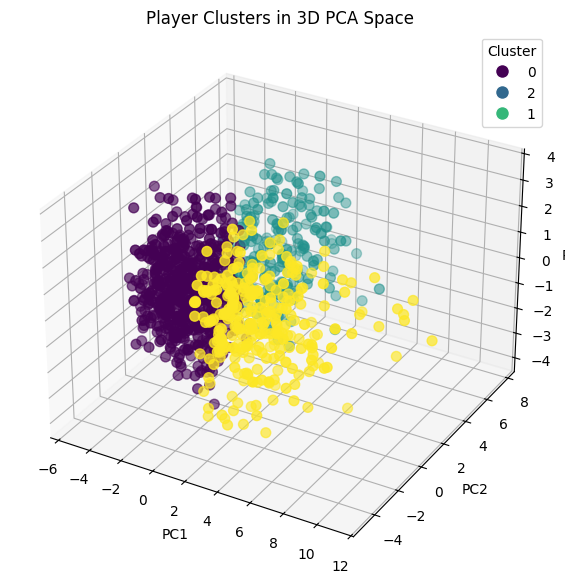

In [105]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Add PC columns to DataFrame
df271_numeric['PC1'] = X_pca[:, 0]
df271_numeric['PC2'] = X_pca[:, 1]
df271_numeric['PC3'] = X_pca[:, 2]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot using PC1, PC2, and PC3
scatter = ax.scatter(
    df271_numeric['PC1'],
    df271_numeric['PC2'],
    df271_numeric['PC3'],
    c=df271_numeric['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_title("Player Clusters in 3D PCA Space")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Optional: create a legend
legend_labels = df271_numeric['Cluster'].unique()
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=plt.cm.viridis(i / len(legend_labels)), markersize=10)
    for i, label in enumerate(legend_labels)
]
ax.legend(handles=legend_handles, title="Cluster")

plt.show()


In [106]:
import plotly.express as px
import pandas as pd

# Assuming you've already done PCA and added PC1, PC2, PC3 to df50_numeric

fig = px.scatter_3d(
    df271_numeric,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    title="Interactive 3D PCA Player Clusters",
    opacity=0.7
)

fig.update_traces(marker=dict(size=5))
fig.show()


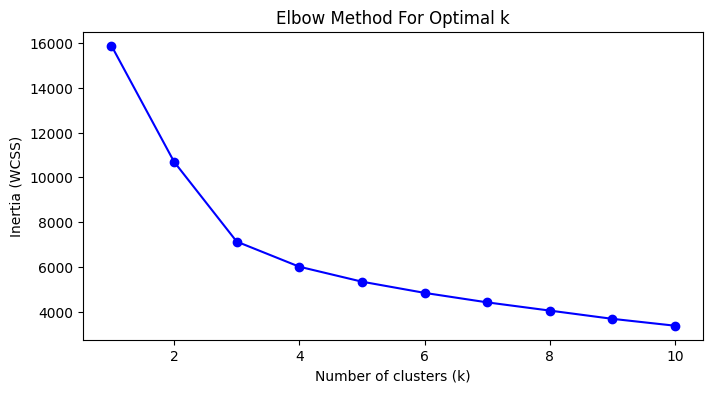

In [107]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()


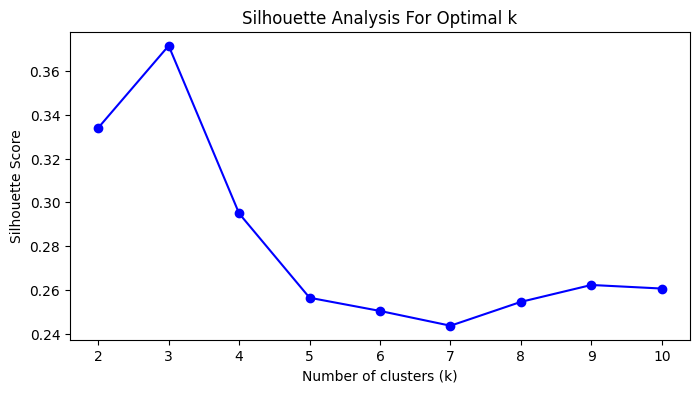

In [108]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # silhouette not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


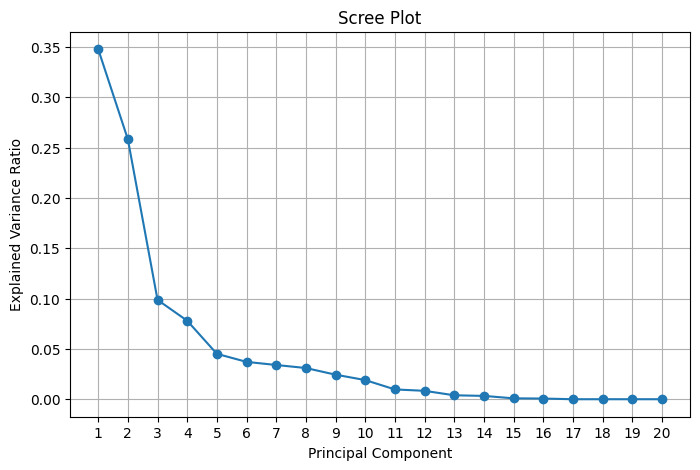

In [109]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Run PCA on your scaled data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


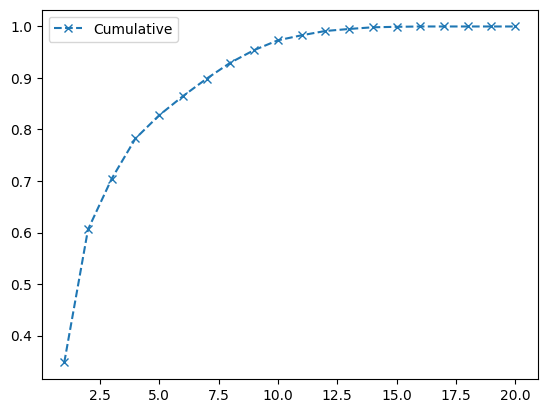

In [110]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='x', linestyle='--', label='Cumulative')
plt.legend()


In [111]:
# Create a DataFrame of loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features
)

# View the first few components
loadings.round(3).iloc[:, :3]


,PC1,PC2,PC3
G,-0.026,-0.000,0.574
GS,0.175,-0.033,0.489
MP,0.161,-0.113,0.593
FG_per36,0.352,-0.057,-0.050
FGA_per36,0.310,-0.200,-0.095
3P_per36,-0.016,-0.372,-0.024
3PA_per36,-0.008,-0.377,-0.047
2P_per36,0.335,0.151,-0.033
2PA_per36,0.347,0.082,-0.067
FT_per36,0.331,-0.026,-0.060


### There are 3 main principal components

The features that load onto the component in the same positive or negative direction correlate in the same manner.

PC 1 is primarily related to high usage players with high stats across points, rebounds, and assists, and turnovers.

PC 2 is primarily related to players with high rebounds and blocks statistics. This was previously explored in correlation heatmaps and is related to player height and player location

PC 3 is primarily related to players with activity in the season per their games played and minutes played values, but few stats. These players are true backups and role players. They provide rest periods throughout the game for the star players, but have low usage per 36 minutes.

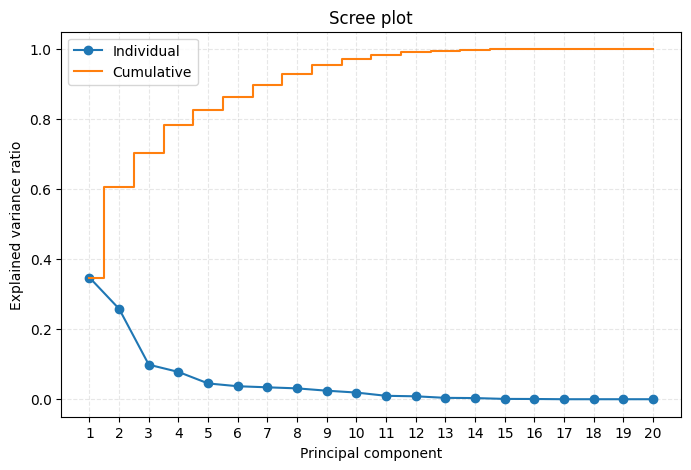

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
G,-0.026,-0.000,+0.574,+0.042,+0.156,+0.454,+0.038,-0.433,+0.201,+0.220
GS,+0.175,-0.033,+0.489,+0.073,-0.019,-0.285,-0.006,+0.477,-0.311,-0.293
MP,+0.161,-0.113,+0.593,+0.067,+0.040,-0.019,+0.029,+0.065,-0.014,-0.017
FG_per36,+0.352,-0.057,-0.050,-0.154,+0.013,-0.004,+0.216,-0.179,-0.172,+0.008
FGA_per36,+0.310,-0.200,-0.095,-0.151,+0.093,-0.005,+0.162,-0.143,-0.149,-0.012
3P_per36,-0.016,-0.372,-0.024,-0.295,+0.374,-0.052,+0.040,+0.038,+0.041,-0.018
3PA_per36,-0.008,-0.377,-0.047,-0.275,+0.379,-0.031,+0.025,+0.043,+0.050,-0.007
2P_per36,+0.335,+0.151,-0.033,+0.019,-0.193,+0.025,+0.178,-0.187,-0.181,+0.017
2PA_per36,+0.347,+0.082,-0.067,+0.055,-0.202,+0.019,+0.158,-0.192,-0.204,-0.007
FT_per36,+0.331,-0.026,-0.060,-0.016,-0.111,+0.256,-0.124,+0.309,+0.431,-0.051


Top |loadings| on PC1:
FG_per36     0.351950
2PA_per36    0.347227
PTS_per36    0.346623
2P_per36     0.334630
FTA_per36    0.333627
FT_per36     0.330638
FGA_per36    0.309794
TOV_per36    0.281292
AST_per36    0.177721
GS           0.175219
Name: PC1, dtype: float64


In [112]:
# ------------------------------------------------------------------
# 1. (Re)scale and fit PCA  – use all components so we can inspect them
# ------------------------------------------------------------------

pca = PCA()                 # keep all components
pca.fit(X_scaled)

# ------------------------------------------------------------------
# 2. Scree plot – variance explained by each component
# ------------------------------------------------------------------
explained = pca.explained_variance_ratio_
cumu      = explained.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o', label='Individual')
plt.step(np.arange(1, len(cumu)+1), cumu, where='mid', label='Cumulative')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.xticks(range(1, len(explained)+1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.show()

# ------------------------------------------------------------------
# 3. Loadings – feature weights on each PC
# ------------------------------------------------------------------
loadings = pd.DataFrame(
    pca.components_.T,                # transpose so rows = features
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features
)

# Inspect the first few PCs – absolute value helps see strongest drivers
display(loadings.iloc[:, :10].style.format("{:+.3f}").background_gradient(cmap="PuBu"))

# Or, see top drivers for a specific PC (here PC1)
print("Top |loadings| on PC1:")
print(loadings['PC1'].apply(abs).sort_values(ascending=False).head(10)) #type:ignore


In [113]:
df271_numeric['Cluster'].value_counts()

Cluster
0    615
2    290
1    222
Name: count, dtype: int64

In [119]:
df_per36 = pd.concat([df271[['Player', 'Age', 'Year', 'Tm', 'Pos']], df271_numeric], axis=1)

In [122]:
df_per36.to_csv(r'..\data_files\df_per36.csv',index=False)